## Problem: Yeast Gene Expression (6 points)

Download the following [data set](https://www.exploredata.net/ftp/Spellman.csv). It shows the expression of specific genes in the yeast *Saccharomyces cerevisiae* over time. The study associated with this data set is described [here](https://www.molbiolcell.org/doi/full/10.1091/mbc.9.12.3273).

(a) Perform a Principal Component Analysis (PCA) of the gene expression over time and produce a scree plot of the explained variance. What is a good number of PCA components? Justify your choice.

(b) Perform K-means clustering on the PCA-transformed gene expression data. Use the number of PCA components you identified in part (a) to transform the data before clustering. Show an "elbow" plot, i.e., the inertia as a function of the number of clusters. What is an appropriate number of clusters?

(c) Use $6$ clusters for simplicity and visualization, regardless of the elbow plot result. Show the average gene expression (averaged over all cluster members) over time for the $6$ clusters.

## Problem A

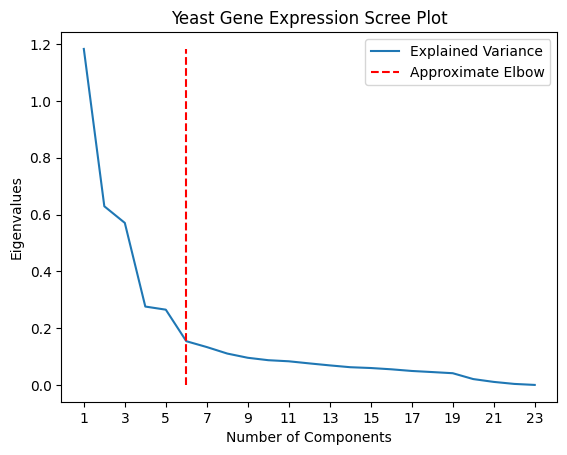

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_csv("Spellman.csv", delimiter=",")
pca = PCA().fit(df.iloc[:, 1:])
eigenvalues = np.arange(pca.n_components_) + 1
plt.plot(eigenvalues, pca.explained_variance_, label = 'Explained Variance') # or explained variance ratio???
plt.title("Yeast Gene Expression Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Eigenvalues")
plt.xticks(np.arange(eigenvalues.min(), eigenvalues.max() + 1, step = 2))
plt.vlines(6, pca.explained_variance_.min(), pca.explained_variance_.max(), colors='red', linestyles='dashed', label = 'Approximate Elbow')
plt.legend()
plt.show()

I would pick 6 components because it is the best balance between eigenvalues and components. Six components seems to be the "elbow" where more components have increasingly diminishing returns. At 6 components, there is the best balance between expense (number of components) and output (number of eigenvalues).

## Problem B

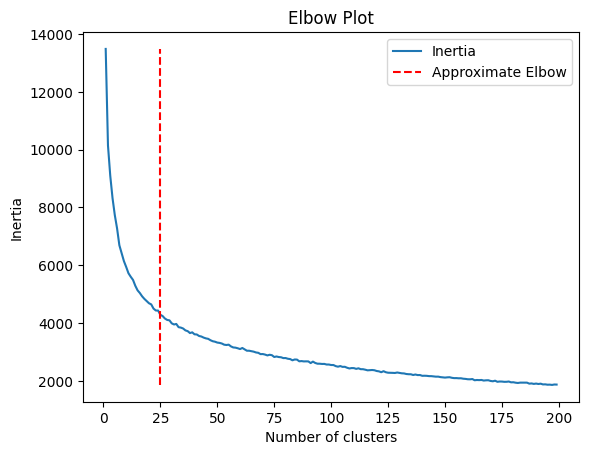

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("Spellman.csv", delimiter=",")
pca = PCA(n_components=6).fit(df.iloc[:, 1:])
X = pca.transform(df.iloc[:, 1:])

cluster_n = range(1, 200)
inertia_list = []
for n in cluster_n:
    kmeans = KMeans(n_clusters=n).fit(X)
    inertia_list.append(kmeans.inertia_)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.plot(cluster_n, inertia_list, label = 'Inertia')
plt.vlines(25, min(inertia_list), max(inertia_list), colors='red', linestyles='dashed', label = "Approximate Elbow")
plt.legend()
plt.show()

Based on this elbow plot, I would estimate the most efficient number of clusters to be around 25.

## Problem C

Text(0, 0.5, 'Average Gene Expression')

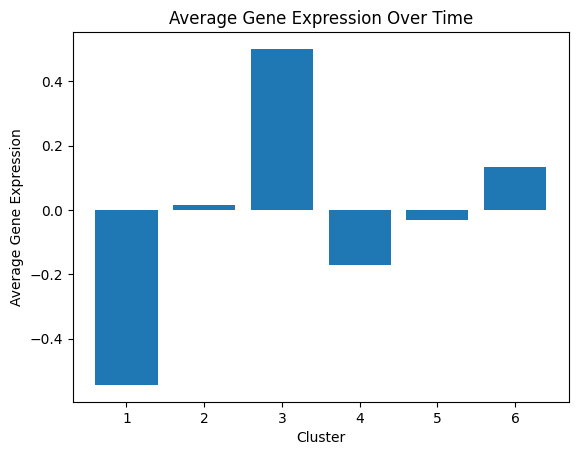

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("Spellman.csv", delimiter=",")
pca = PCA(n_components=6).fit(df.iloc[:, 1:])
X = pca.transform(df.iloc[:, 1:])
cluster_n = 6
kmeans = KMeans(n_clusters=cluster_n).fit(X)
plt.bar(range(1, cluster_n + 1), np.mean(kmeans.cluster_centers_, axis = 1))
plt.title("Average Gene Expression Over Time")
plt.xlabel("Cluster")
plt.ylabel("Average Gene Expression")